# Análisis exploratorio de los datos

## I. Estadística
La __estadística__ es un conjunto de técnicas matemáticas usdas para describir un fenómeno de interés a partir de un conjunto de datos que presentan variabilidad. Se trata de una colección de métodos para obtener conclusiones acerca de una o varias características de interés de la población, usando _información parcial_ provista por una muestra de dicha población. La estadística estudia __fenómenos aleatorios__.

Dentro de la estadística encontramos dos grandes ramas: La __inferencia estadística__ y la __estadística descriptiva__. La primera permite deducir o _inferir_ cómo se constituye, distribuye o relacion la población bajo estudio, así como las __relaciones estocásticas__ entre las _variables_ de interés, a partir de la información contenida en la muestra. La segunda se enfoca en la descripción, visualización y resumen de los datos originados a partir del fenómeno de estudio con el propósito de facilitar su aplicación y manejo, generalmente con el apoyo de gráficas, tablas o medidas numéricas. 

In [1]:
x <- rnorm(100, 15, 30)
t <- rpois(120, 45)

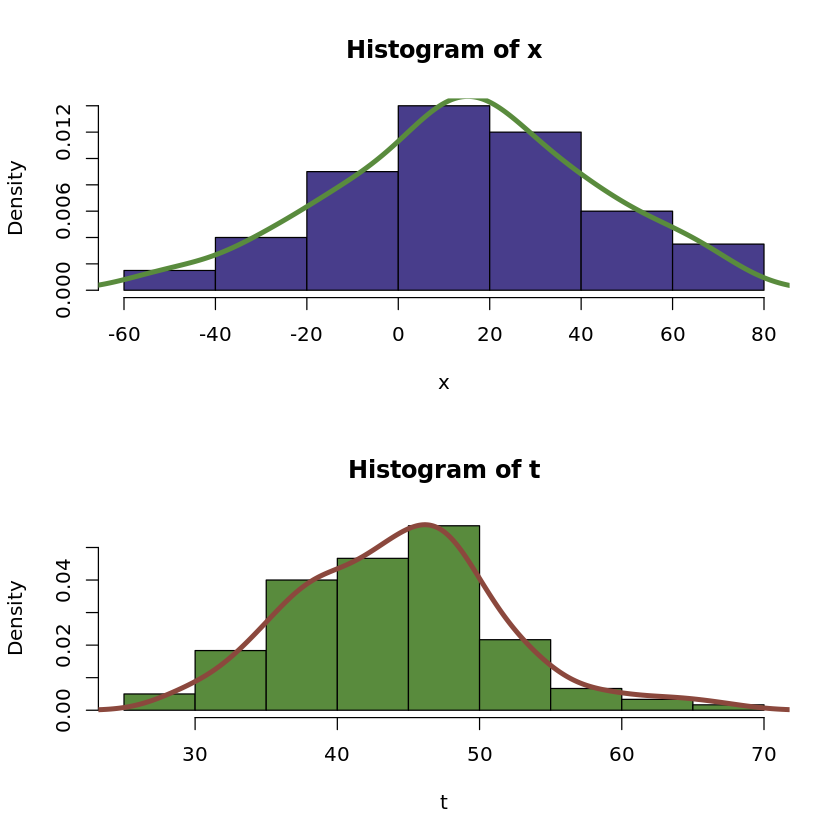

In [2]:
par(mfrow = c(2,1))
hist(x, probability = TRUE, col = "#483d8b")
lines(density(x), col = "#598b3d", lwd = 4)

hist(t, probability = TRUE, col = "#598b3d")
lines(density(t), col = "#8b483d", lwd = 4)

par(mfrow = c(1,1))

En el ejemplo anterior tenemos $X_1,...X_{100}$ y $T_1,...T_{120}$ muestras aleatorias. Las preguntas aquí son:
1. ¿Cómo se distribuyen $X$ y $T$? ¿Puedo ajustar una distribución de probabilidad conocida?
2. ¿Cuáles son sus parámetros?
3. ¿Qué información puedo obtener a partir de los datos observados?
4. Si supongo que $X \sim N(15, 30)$, ¿Cómo puedo comprobar que esa es efectivamente la distribución de $X$? ¿Qué sucede si al estimar la media obtengo $\overline{X} = 13.2$? ¿Qué tanto puedo mover al parámetro de la varianza?
5. Si supongo que $T \sim Poi(\lambda)$, ¿cómo estimo a la tasa $\lambda$? ¿Cuál es el mejor estimador? ¿Puedo afirmar que $\lambda$ está dentro de un intervalo?  

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



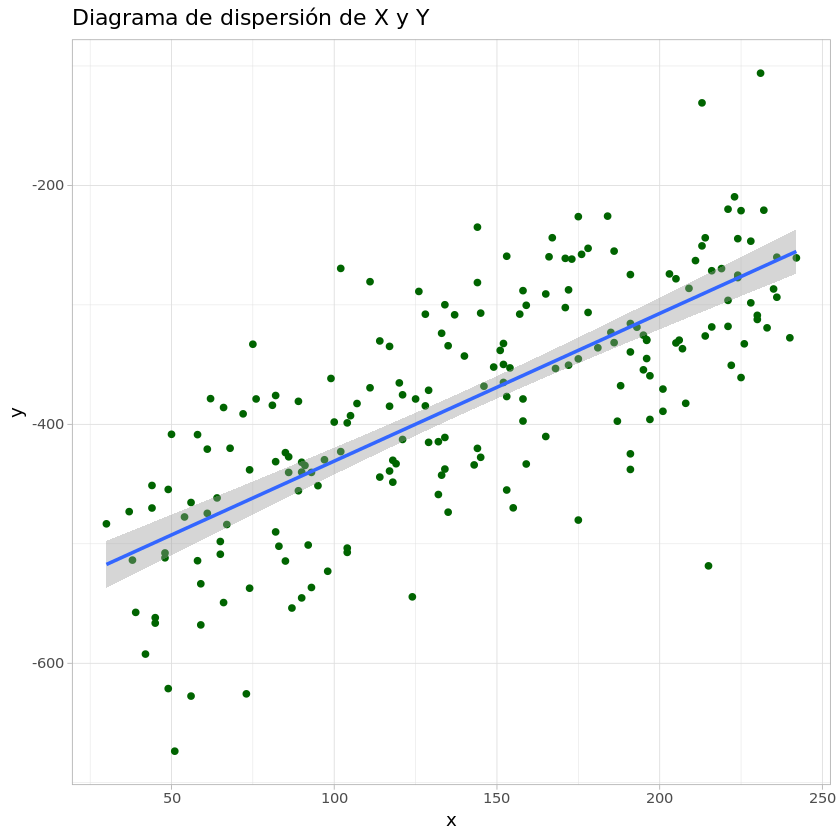

In [3]:
library(ggplot2)
x <- seq(1,200, by = 1) + rpois(200, 40)
y <- seq(1,200, by = 1) - rgamma(200, 50, 0.1) + 0.1*x
ggplot(data = NULL, aes(x = x, y = y)) + geom_point(color = "dark green") + theme_light() + 
ggtitle("Diagrama de dispersión de X y Y") + geom_smooth(method = "lm")

En el diagrama anterior tenemos definidas dos variables $X$, $Y$ y hemos dibujado el diagrama de dispersión entre ellas, con el fin de visualizar su comportamiento conjunto. 
1. ¿Cuál es la correlación entre las variables?
2. ¿Existe alguna relación entre ellas? ¿Es lineal? ¿Es polinomial? ¿Es exponencial? ¿Cómo puedo sustentar dicha suposición?¿Cuáles serían los parámetros?
3. ¿Existen valores atípicos? ¿Afectan mi análisis? Si ajusto un modelo, ¿debo removerlos o considerarlos?

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,0.3524897,0.3790644,0.1736640,0.1053856
versicolor,0.5161711,0.3137983,0.4699110,0.1977527
virginica,0.6358796,0.3224966,0.5518947,0.2746501


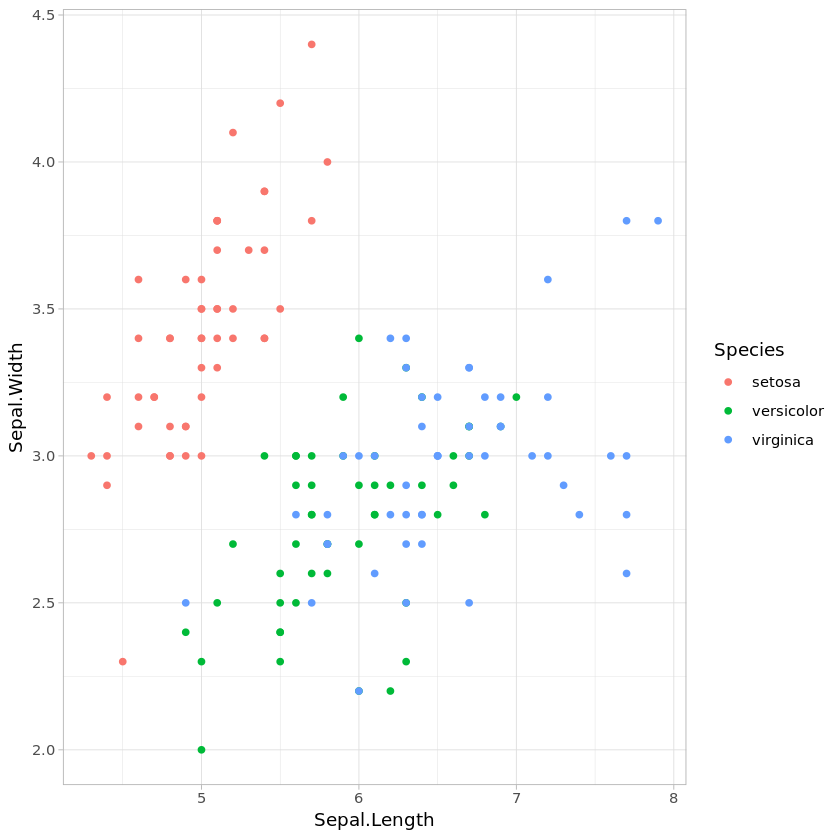

In [9]:
data("iris")
summary(iris)
ggplot(data = iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + geom_point() + theme_light()
aggregate(. ~ Species, data = iris, mean)
aggregate(. ~ Species, data = iris, sd)

Los datos anteriores muestran el conjunto de datos _iris_, que tiene registradas 150 flores pertenecientes a 3 especies, a las cuales se les midió la longitud y ancho del sépalo, la longitud y ancho de los pétalos. Podemos preguntarnos lo siguiente:
1. ¿Existe una diferencia significativa entre cada especie?
2. ¿Podemos decir que las muestras provienen de la misma distribución?
3. ¿La variabilidad es la misma para las 3 especies?
4. ¿Existe alguna relación entre la longitud y el ancho del sépalo?

## Tipos de variables


En la estadística siempre trabajamos con muestras aleatorias. Una __muestra__ es un subconjunto de la población. Cuando nos referimos a una __muestra aleatoria__ tomamos la definición de probabilidad de una colección de __variables aleatorias__ independientes e idénticamente distribuidas; es decir, definimos una muestra aleatoria $X_1,...,X_n$ como una colección de __v.as. iid__. Cuando tenemos una muestra, le llamanos __tamaño de la muestra__ al número de elementos en ella y generalmente se denota con la letra $n$. 

Se entiende por __datos__ al conjunto de observaciones de una o múltiples variables de interés para todos los elementos de una muestra. Una __variable__ es una característica de interés que posee cada elemento de la población y que se puede medir o cuantificar.

Para el estudio de las muestras, las variables se dividen en dos ramas: cualitativas y cuantitativas. A su vez, las variables cualitativas se subdividen (por su escala) en ordinales, nominales y binarias. Las variables cuantitativas se subdividen en discretas y continuas.

### Variables cuantitativas 
Una variable es cuantitativa si sus valores son números y representan una cantidad; por ejemplo, la estatura de una persona medida en metros, la cantidad de hijos que tiene una pareja, la duración en minutos de la actividad física que realiza un deportista, etc. 
1. __Discreta__. Si el conjunto de posibles valores tiene un número finito de elementos o infinito numerable. Podemos pensar a una variable discreta como aquellas que toman valores en números enteros (por lo general). Ejemplos: número de años promedio que vive una persona ({1,...,120}), peso medido en Kg de una vaca ({0,1,2,...,1600}), el sueldo mensual que gana un trabajador en pesos ({1,..., 1 000 000}).

2. __Continua__. Si el conjunto de posibles valores es un intervalo (a,b) de números reales y no son valores aislados. Podemos pensar a una variable continua como una variable que toma valores tanto enteros como decimales y puedo agruparlos en intervalos.

### Variables cualitativas
Una variable es cualitativa si su valores representan una cualidad, un atributo o una categoría; por ejemplo, el sexo de una persona, la nacionalidad, el voto por algún partido político, etc. 
1. __Ordinal__. Este tipo de variables no tienen un orden de manera formal, pero se le puede asignar uno con un sentido ascendente o descendente. No existe una distancia entre orden ni entre categorías, únicamente se expresan los atributos y se pueden interpretar como tal. Ejemplos: El servicio en un restaurante (excelente, bueno, regular, malo, pésimo), la calificación de una película (1,2,3,4,5).

2. __Nominal__. No se puede asignar ningún orden, únicamente se cuenta con etiquetas que funcionan como identificadores. Ejemplos: Color de pelaje de un gato (negro, blanco, gris, naranja, etc.), estado civil de una persona (soltero, casado, divorciado, viudo).

3. __Binaria__. Se utilizan cuando la variable expresa la presencia o ausencia de un atributo específico. En esta variable podemos responder "Sí"/"No". Ejemplos: ¿Tiene hijos?, ¿Tiene antecedentes de cáncer en su familia?, ¿Es mayor de edad?


In [1]:
data_heart <- read.csv("heart.csv")
summary(data_heart)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [2]:
data_heart$sex <- as.factor(data_heart$sex)
data_heart$cp <- as.factor(data_heart$cp)
data_heart$fbs <- as.factor(data_heart$fbs)
data_heart$restecg <- as.factor(data_heart$restecg)
data_heart$exang <- as.factor(data_heart$exang)
data_heart$target <- as.factor(data_heart$target)
data_heart$slope <- as.factor(data_heart$slope)
data_heart$ca <- as.factor(data_heart$ca)
data_heart$thal <- as.factor(data_heart$thal)
summary(data_heart)

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:47.50   1:207   1: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :55.00           2: 87   Median :130.0   Median :240.0          
 Mean   :54.37           3: 23   Mean   :131.6   Mean   :246.3          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.5          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak     slope   ca      thal    target 
 0:147   Min.   : 71.0   0:204   Min.   :0.00   0: 21   0:175   0:  2   0:138  
 1:152   1st Qu.:133.5   1: 99   1st Qu.:0.00   1:140   1: 65   1: 18   1:165  
 2:  4   Median :153.0           Median :0.80   2:142   2: 38   2:166          
         Mean   :149.6           Mean   :1.04           3: 20   3:117          
         3rd Qu.:166.0           3rd Qu.:1.60           4:  5                  
         

## Medidas de tendencia central

Las medidas de tendencia central buscan un valor central (que puede estar en el conjunto de datos o no) que "represente" a los datos. Estas medidas son ocupadas frecuentemente para dar un resumen muy sencillo de la distribución de los datos. 

1. __Media muestral__. Se define como el promedio de los datos observados. Es decir, $$\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$$ 
La media muestral es la más utilizada como representante de los datos. Sin embargo puede no ser tan buena representante cuando hay presencia de valores atípicos extremos o mucha dispersión entre los datos. 

2. __Mediana__. Es un valor central que acumula el 50% de los datos. Este valor separa al conjunto de datos ordenados en dos partes iguales. Para obtener a la mediana se ordenan los datos -incluyendo a los datos repetidos- de menor a mayor, donde los datos ya ordenados se representan como $X_{(1)}, X_{(2)},...,X_{(n)}$. 

Si $n$ es impar, entonces $$Med = X_{((n+1)/2)}$$

Si $n$ es par, entonces $$Med = \frac{1}{2}[X_{(n/2)}+X_{((n/2)+1)}]$$

La mediana se considera una medida más robusta que la media debido a que presenta menor afectación ante la presencia de valores atípicos en el conjunto de datos. 

3. __Moda__. Se define como el dato que más veces se repite en el conjunto de datos. La moda puede no existir (todos los datos aparecen el mismo número de veces), puede ser única (el conjunto es unimodal), e incluso pueden existir dos o más modas. 



## Medidas de dispersión

Las medidas de dispersión permiten medir el grado de dispersión o variabilidad que presenta el conjunto de datos. 

1. __Varianza muestral__. La varianza se define como el promedio de la distancia al cuadrado de cada uno de los datos respecto a la media muestral. Es decir, $$S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2$$ 
La varianza se encuentra en unidades cuadradas, por lo que se prefiere utilizar a la desviación estándar para la interpretación, debido a que la desviación se encuentra en las unidades del conjunto de datos.


2. __Desviación estandar__. Se define como la raíz cuadrada (positiva) de la varianza. 
$$S = \sqrt[+]{S^2}$$


3. __Rango__. Indica la distancia máxima entre cualesquiera dos datos. Para calcularlo, se realiza la diferencia del dato máximo y el dato mínimo. $$ Rango = X_{(n)} - X_{(1)}$$


4. __Coeficiente de variación__. Esta medida de dispersión relativa establece una relación entre el tamaño de la media y la variabilidad de los datos. Usualmente se multiplica por 100% para expresar el porcentaje de variabilidad que presentan los datos. 
$$CV = \frac{S}{\overline{X}} \cdot 100\% $$
El coeficiente de variación se utiliza para comparar la variabilidad de dos conjuntos de datos distintos con una misma variable de interés.

5. __Rango intercuantil__. Se define como la diferencia entre el tercer cuartil ($Q_3$) y el primer cuartil ($Q_1$).
$$RI = Q_3 - Q_1 = q_{0.75} - q_{0.25} $$

## Medidas de posición
1. __Cuantiles__. El cuantil p, denotado por $q_p$ es el valor que acumula el $p\%$ de los datos, es decir, el $p\%$ de los datos son menores o iguales a él. Generalmente se utilizan los __cuartiles__, que son aquellos valores que dividen a la distribución de los datos en cuatro partes ($q_{0.25}, q_{0.50}, q_{0.75}$); no obstante también existen los quintiles, deciles, percentiles, entre otros. 

Para obtener los cuantiles de una muestra se ordenan los datos de menor a mayor. Se determina el valor de $np$ donde $n$ es el tamaño de la muestra y $p$ la proporción deseada. 

$\bullet )$ Si $np$ no es un entero, $q_p = X_{( \lceil np \rceil)}$.

$\bullet )$ Si $np$ es un entero, $q_p = \frac{1}{2} [X_{(np)} + X_{(np + 1)}]$

Cabe destacar que los cuartiles no siempre equidistan. Esto depende de la forma de la distribución de los datos.

__Nota:__ El cuantil $Q_{2} = q_{0.5}$ es la mediana.

## Medidas de forma

1. __Asimetría o sesgo.__ Una distribución es simétrica si su media, mediana y moda coinciden. En caso contrario decimos que la distribución es asimétrica o sesgada. El __coeficiente de asimetría__ se define como
$$\gamma_1 = \frac{1}{(n-1)(n-2)} \sum_{i=1}^n \left( \frac{X_i - \overline{X}}{S} \right)^3 $$

a) $ \gamma_1 = 0 $. En este caso la distribución es simétrica.

b) $ \gamma_1 > 0$. La distribución es asimétrica positiva (la media es mayor a la mediana).

c) $ \gamma_1 < 0$. La distribución es asimétrica negativa (la media es menor a la mediana).

2. __Curtosis.__ Mide la cantidad de datos que se agrupan en torno a la moda. El __coeficiente de curtosis__ se define como
$$K = \frac{1}{nS^4} \sum_{i=1}^n (X_i - \overline{X})^4 - 3 $$

a) $K < 0$. El agrupamiento es negativo. La distribución es platicúrtica o aplanada (colas más pesadas que la normal).

b) $K = 0$. El agrupamiento es normal. La distribución es mesocúrtica (colas parecidas a la normal).

c) $K > 0$. El agrupamiento positivo. La distribución es leptocúrtica o puntiaguda (colas más ligeras que la normal).


       Ji              Gamma             Beta              T            
 Min.   : 0.2588   Min.   : 51.51   Min.   :0.3066   Min.   :-4.397158  
 1st Qu.: 2.0605   1st Qu.: 76.19   1st Qu.:0.5423   1st Qu.:-0.806205  
 Median : 3.4956   Median : 83.17   Median :0.6262   Median :-0.009156  
 Mean   : 4.2496   Mean   : 83.25   Mean   :0.6221   Mean   :-0.010428  
 3rd Qu.: 5.6714   3rd Qu.: 89.93   3rd Qu.:0.6925   3rd Qu.: 0.734712  
 Max.   :23.0751   Max.   :123.81   Max.   :0.8655   Max.   : 3.049989  

Varianza 


Ji        Gamma         Beta            T 
  9.34612331 131.46552169   0.01040238   1.25973128

Desviacion estandar 


Ji     Gamma      Beta         T 
 3.057143 11.465842  0.101992  1.122378

Coeficiente de variacion 


Ji        Gamma         Beta            T 
    71.93925     13.77335     16.39477 -10762.95607

Coeficiente de asimetria 


Ji         Gamma          Beta             T 
 0.0061575368  0.0012472804 -0.0006427494 -0.0002705680

Curtosis

Ji      Gamma       Beta          T 
 5.7295383  0.6901968 -0.3342605  0.5639669

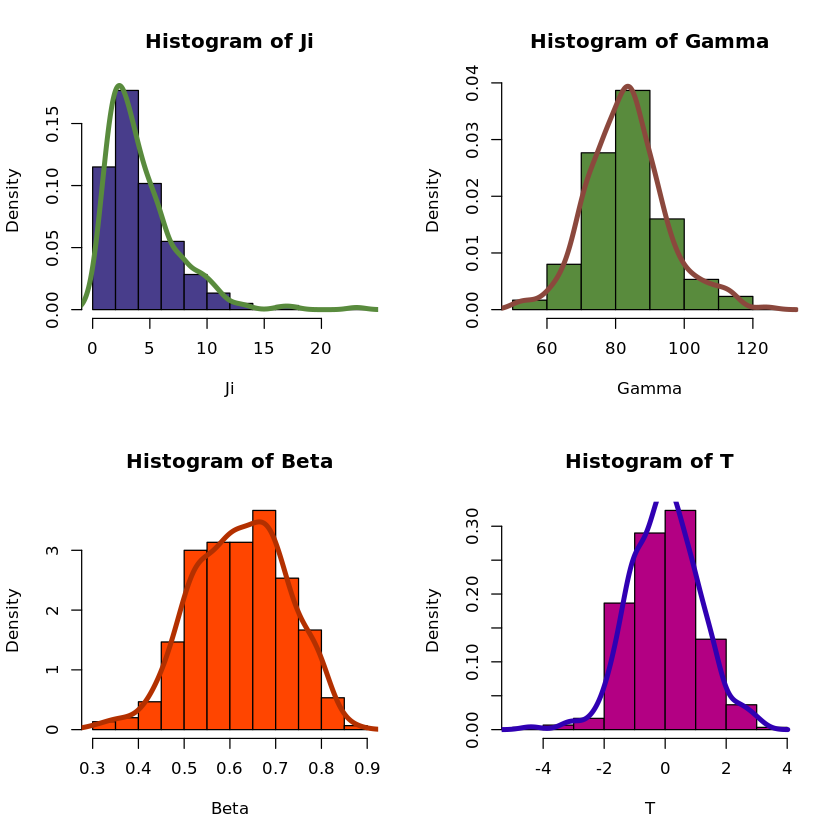

In [4]:
set.seed(1989)

Ji <- rchisq(300, 4)
Gamma <- rgamma(300, 50, 0.6)
Beta <- rbeta(300, 15, 9)
T <- rt(300, 12)


par(mfrow = c(2,2))
hist(Ji, probability = TRUE, col = "#483d8b")
lines(density(Ji), col = "#598b3d", lwd = 4)

hist(Gamma, probability = TRUE, col = "#598b3d")
lines(density(Gamma), col = "#8b483d", lwd = 4)

hist(Beta, probability = TRUE, col = "#ff4500")
lines(density(Beta), col = "#b33000", lwd = 4)

hist(T, probability = TRUE, col = "#b30083")
lines(density(T), col = "#3000b3", lwd = 4)

par(mfrow = c(1,1))

frame <- data.frame(Ji, Gamma, Beta, T)
summary(frame)

gamma1 <- function(x){
    (1/((length(x)-1)*(length(x)-2)))*sum(((x - mean(x))/sd(x))^3)
}
kurtosis <- function(x){
     1/(length(x)*(sd(x))^4)*sum((x - mean(x))^4) - 3
}

cv <- function(x){
    sd(x)/mean(x) * 100
}
cat("Varianza \n")
apply(frame, 2, var)

cat("Desviacion estandar \n")
apply(frame, 2, sd)

cat("Coeficiente de variacion \n")
apply(frame, 2, cv)

cat("Coeficiente de asimetria \n")
apply(frame,2,gamma1)

cat("Curtosis")
apply(frame,2,kurtosis)

## Representación gráfica
Facilitan el análisis de la información al mostrar patrones con respecto al comportamiento de las variables que se están estudiando. La representación gráfica sirve para resumir y mostrar la información de los datos.

1. __Gráfica de barras__. Sirve para variables categóricas. Es un arreglo simple que acomoda las categorías de la variable en algún orden y representa la frecuencia de las categorías en su altura.

2. __Gráficas de pastel__. Representa la frecuencia relativa de las posibles respuestas de una variable categórica. La frecuencia de cada categoría se representa mediante un segmento del círculo cuyo ángulo se calcula como $n_i \cdot 360$, con $n_i$ la frecuencia relativa.

3. __Histogramas__. Se utiliza para variables continuas. El histograma da un panorama general de la distribución de la muestra al dividir al conjunto de datos en $k$ intervalos que representará como barras, cuya altura será la frecuencia relativa de cada intervalo. Se puede agregar una curva suavizada por encima de las barras que representa la densidad ajustada de los datos. 

4. __Boxplots__. Sirve para representar la dispersión de los datos, si existe asimetría y para detectar valores atípicos. Entre más larga sea la caja, mayor dispersión hay. Si la mediana se acerca a la base superior de la caja, la distribución de los datos es asimétrica negativa, y si la mediana se acerca a la base inferior, la distribución es asimétrica positiva.

5. __Diagramas de dispersión__. Los diagramas de dispersión representan en dos dimensiones la relación que existe entre dos variables (un punto representa una pareja $(x,y)$). Los diagramas de dispersión pueden informar si existe una relación entre las variables, así como una idea de la correlación y la dispersión de los datos de manera conjunta. 

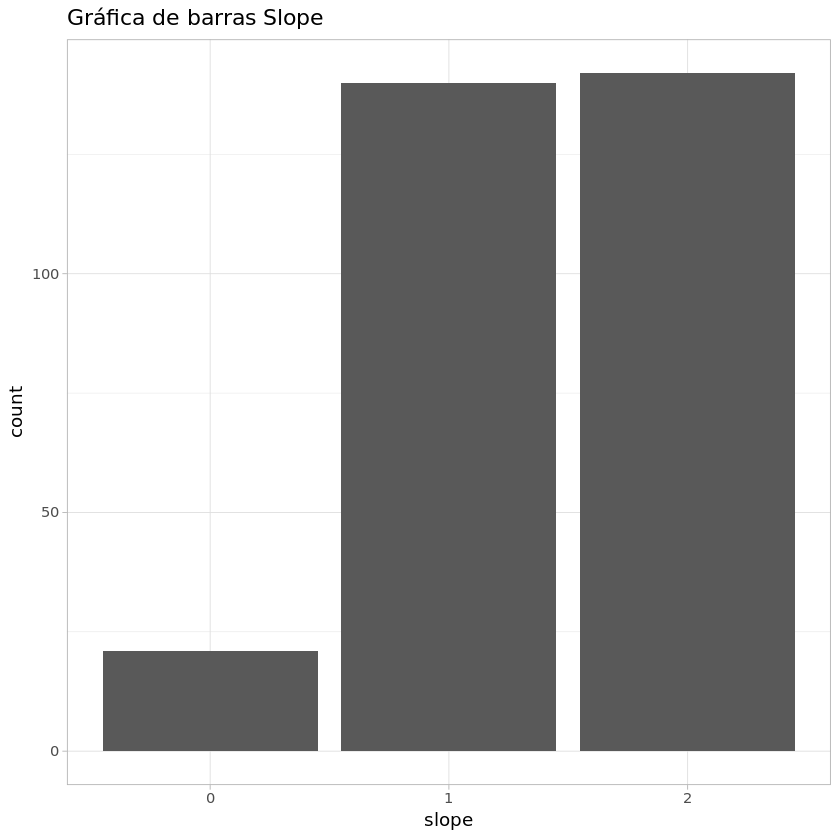

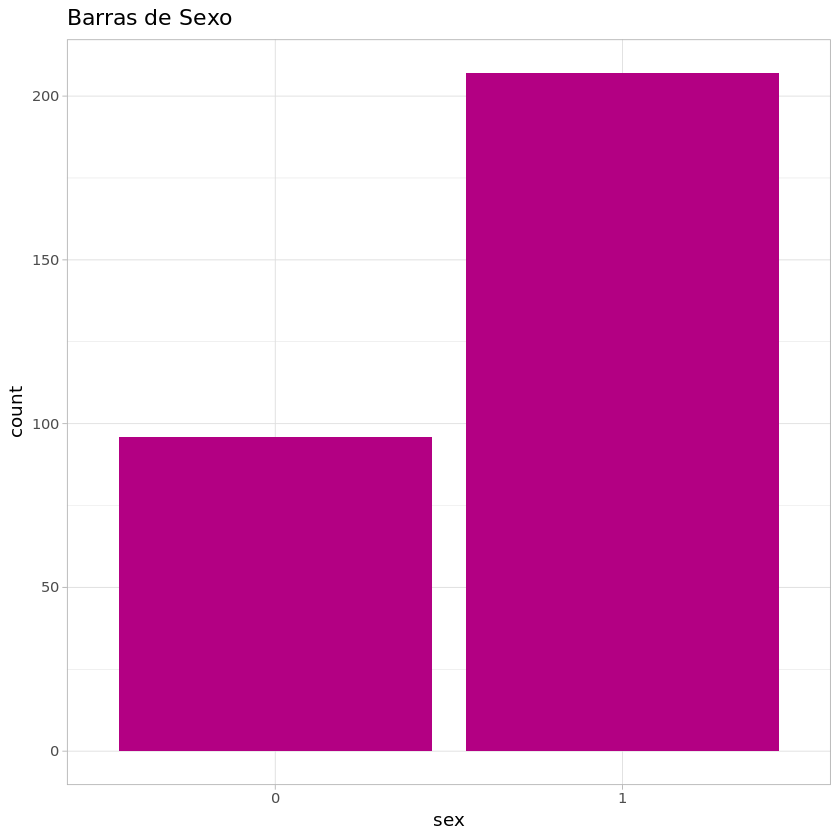

In [32]:
##Graficas de barras

ggplot(data = data_heart, aes(x = slope)) + geom_bar() + theme_light() + ggtitle("Gráfica de barras Slope")
ggplot(data = data_heart, aes(x = sex)) + geom_bar(fill = "#b30083") + theme_light() + ggtitle("Barras de Sexo")

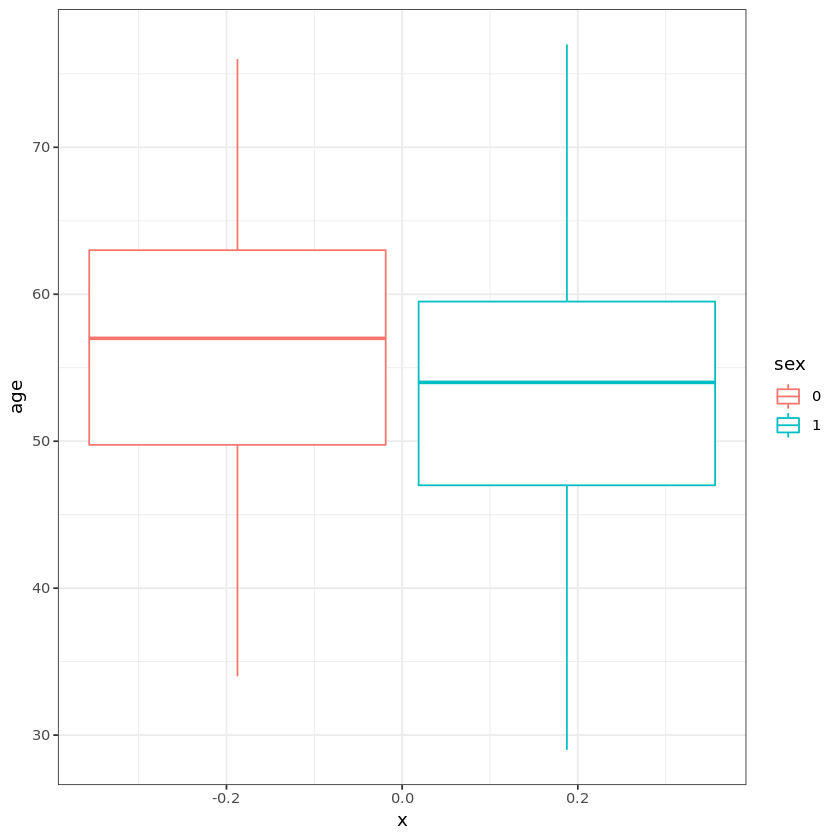

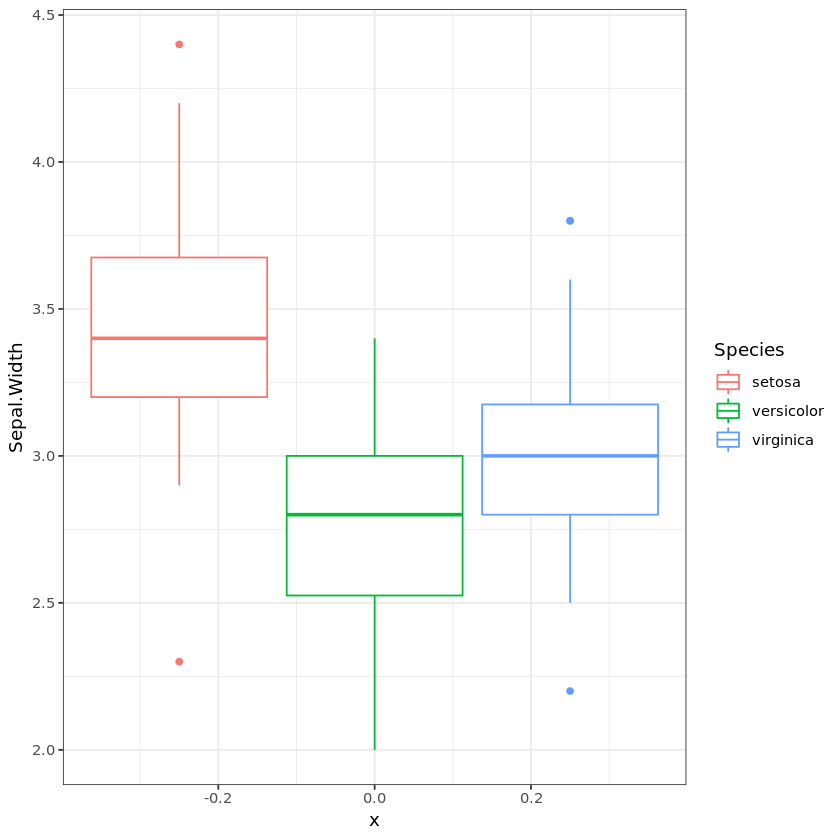

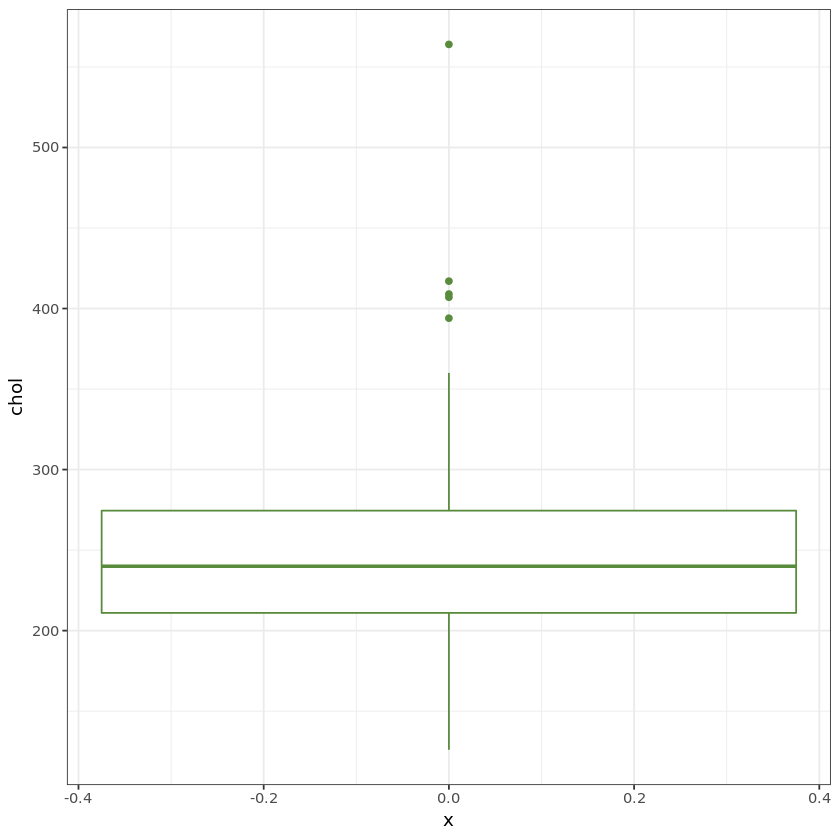

In [41]:
## Boxplots
ggplot(data = data_heart, aes(x = 0, y = age, col = sex)) + geom_boxplot() + theme_bw()
ggplot(data = iris, aes(x = 0, y = Sepal.Width, col = Species)) + geom_boxplot() + theme_bw()
ggplot(data = data_heart, aes(x = 0, y = chol)) + geom_boxplot(color = "#598b3d" ) + theme_bw()

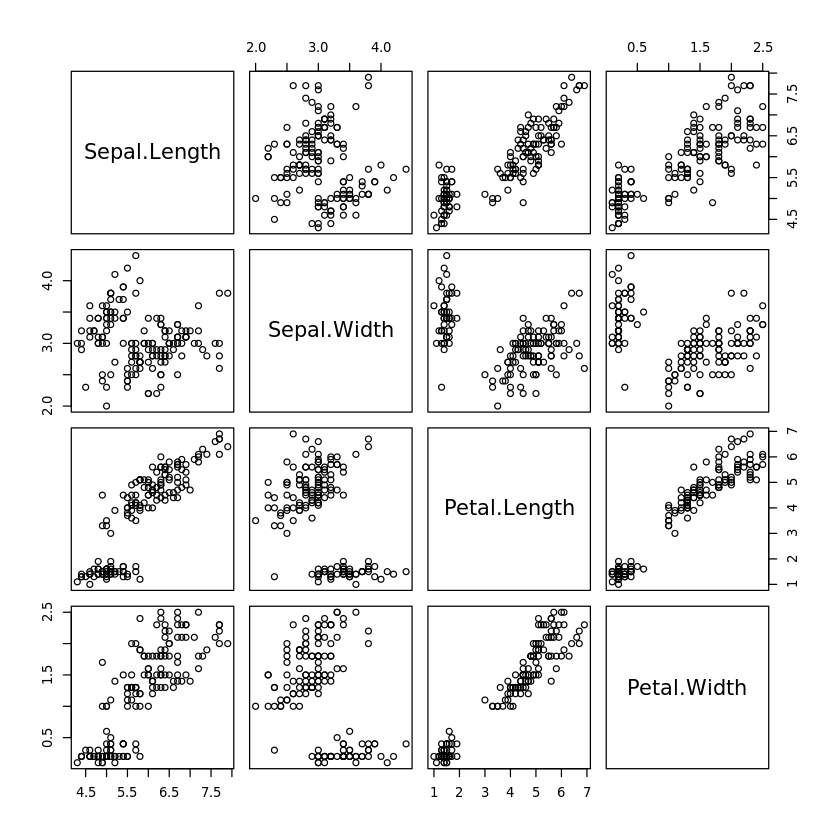

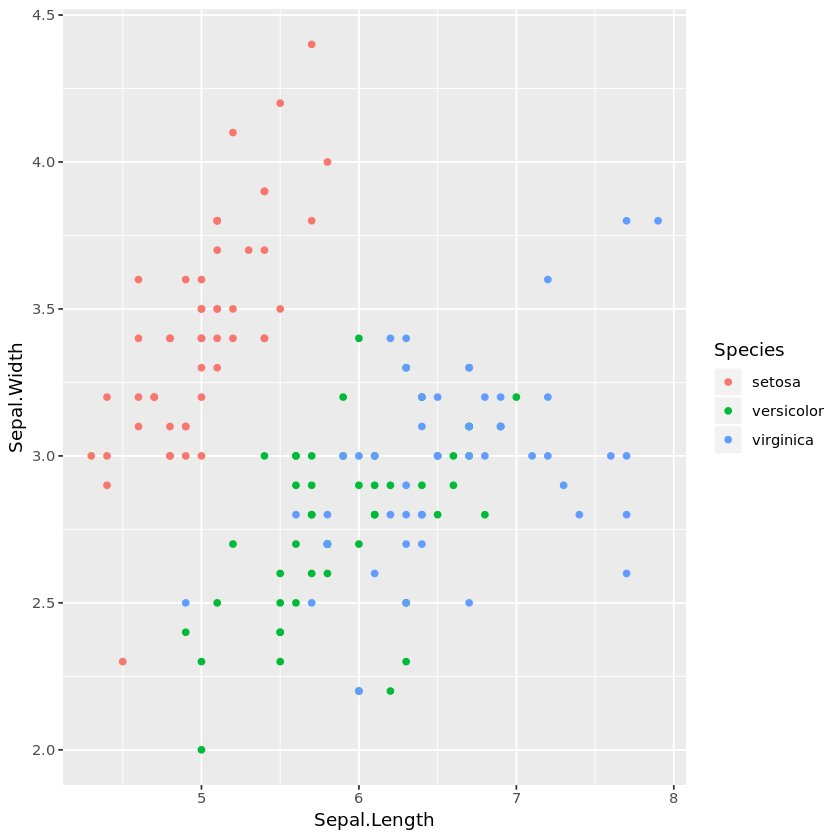

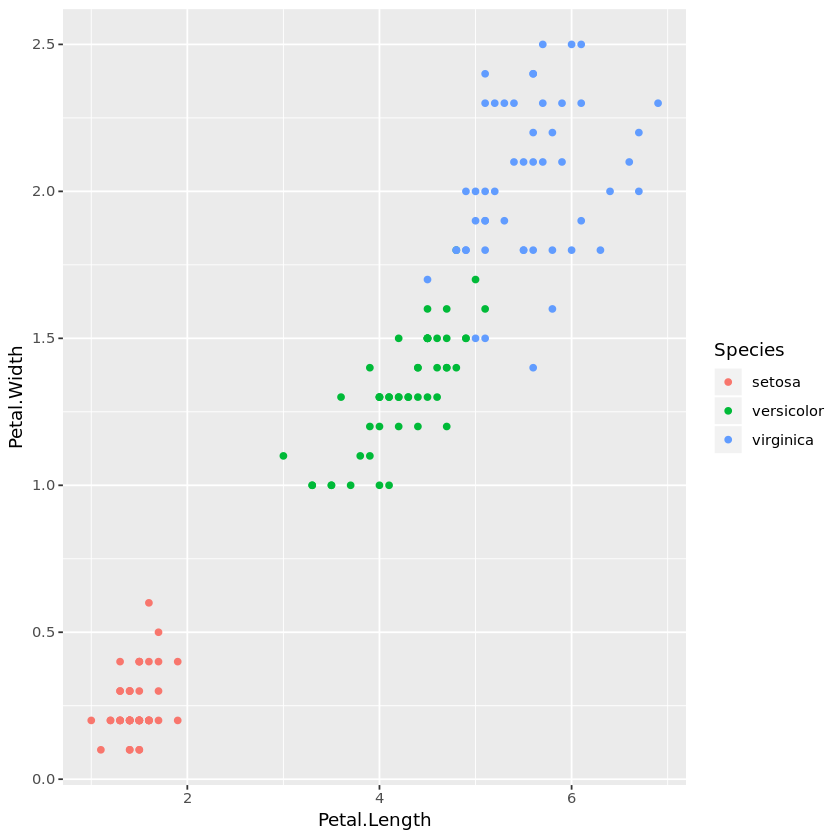

In [54]:
## Diagramas de dispersion
pairs(iris[1:4])
ggplot(data = iris, aes(x = Sepal.Length, y = Sepal.Width, col = Species)) + geom_point()
ggplot(data = iris, aes(x = Petal.Length, y = Petal.Width, col = Species)) + geom_point()

## Valores atípicos extremos y NAs

Cuando trabajamos con datos no estamos exentos a tener distintas problemáticas que son ajenas a nosotros pero que pueden causarnos conflictos. Sucede que en algunos contextos ocurren errores de medición, no se registran los datos de manera correcta, o bien, existen valores que se alejan totalmente de los datos. Cuando hay valores muy alejados de los demás estamos en la presencia de __valores atípicos extremos__ y cuando existen valores ausentes les llamamos __NAs__. 
Existen distintas decisiones cuando estamos frente a la presencia de estos valores:

1. Eliminar esos valores sin importar nada.
2. Eliminar valores atípicos tomando en cuenta criterios estadísticos, como el Criterio de Chauvenet.
3. Imputar datos en presencia de NAs.
4. Ajustar los modelos de interés y verificar si esos datos causan problemas. 

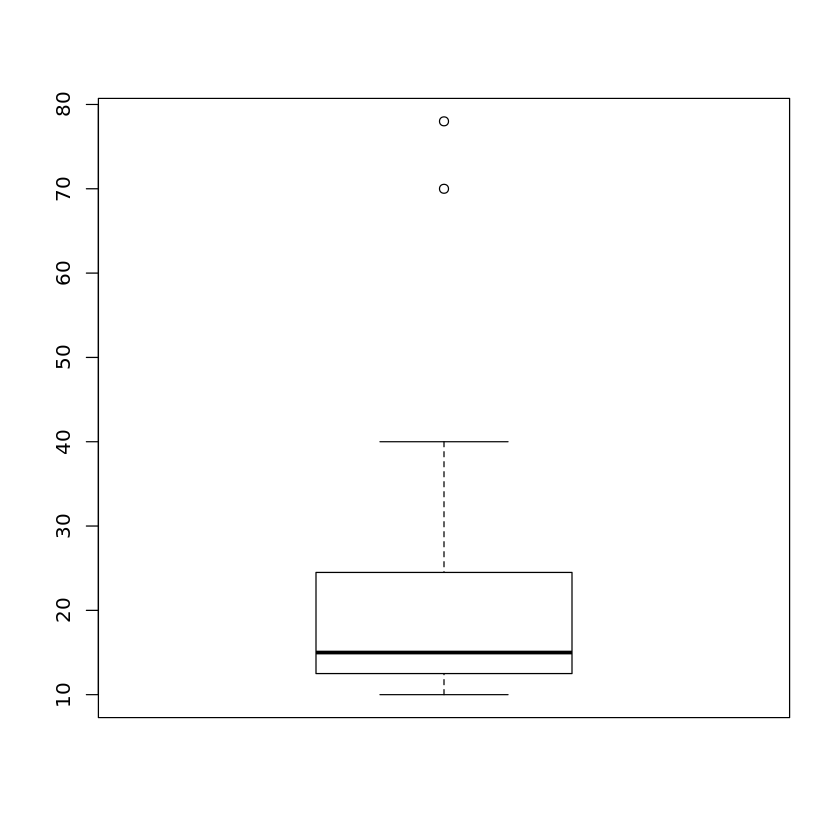

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    2.50   12.00   11.73   14.00   34.00       4 

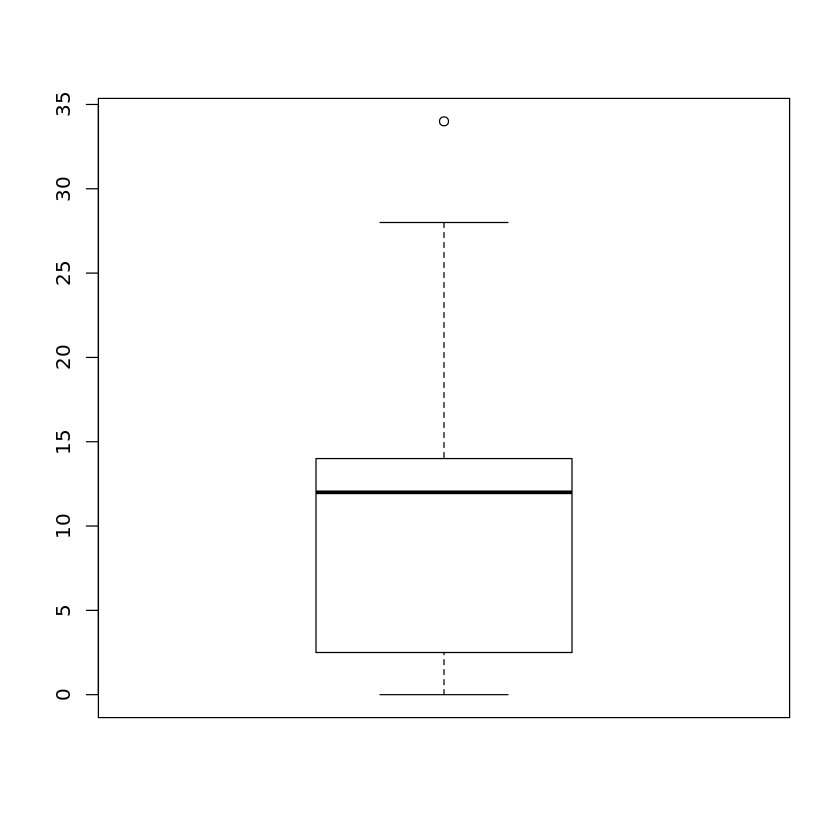

In [2]:
x <- c(14,13,12,12,13,15,19,29,20,21,28,40,70,12,12,14,15,10,78)
y <- c(14,14,12,0,1,12,1,1,4,NA,NA,8,7,NA,12,NA,28,28,34)

boxplot(x)
boxplot(y)
summary(y)